## Part 1: Income Level Classification
**Objective:** Building a robust predictive model to identify high-earning individuals (Income > $50K) based on demographic and employment data from the US Census. 

This notebook covers the end-to-end supervised machine learning pipeline: data preprocessing, statistically-driven feature selection, hyperparameter tuning, and final model evaluation.

In [1]:
%cd Part1_Classifier

/home/manoj/Github_Repos/TakeHomeProject_OCT2025/JPMC-TakeHome/Part1_Classifier


### 1. Data Preprocessing
Before feeding data into our machine learning models, we must clean and standardize it. This script handles:
* **Handling Missing/Noisy Data:** Cleaning up "Not in universe" or unknown values.
* **Feature Engineering:** Condensing complex categorical variables into simpler, more meaningful groupings.
* **Encoding:** Transforming categorical text variables into a numeric format suitable for modeling.

In [2]:
!echo "Running data preprocessing..."
%run data_preprocessing.py

Running data preprocessing...
Preprocessed CSV files saved successfully!
Training set: 169594 rows, 26 columns
Testing set: 29929 rows, 26 columns


### 2. Feature Selection using Normalized Mutual Information (NMI)
Feeding a model too many features can lead to overfitting and sluggish performance. 

To prevent this, we use **Normalized Mutual Information (NMI)**. NMI measures the statistical dependence between each feature and our target variable (`label`). This allows us to filter out noise and retain only the most predictive features.

Running NMI-based feature selection...
Calculating Feature Importance (Mutual Information)...

Top 5 Dynamic Rankings:
total_investment         0.239650
major occupation code    0.227558
education_num            0.213381
weeks worked in year     0.213341
veterans benefits        0.204628
dtype: float64
25 features ranked in total.

Starting Logistic Regression Simulation...
Evaluating top 25 features...
--- PERFORMANCE RANKING (Top Subsets) ---
Features   | F1-Score  
-------------------------
25         | 0.4034
24         | 0.4033
23         | 0.4032
22         | 0.4031
21         | 0.4027
14         | 0.4026
20         | 0.4026
19         | 0.4021
15         | 0.4020
16         | 0.4019

Obtained elbow point at around 14 features, with diminishing returns observed beyond that.
Saving top features for future reference...
Saved 14 features to ../processed_datas/top_14_features.columns
Saved 25 features to ../processed_datas/top_25_features.columns

Top 14 Features saved:


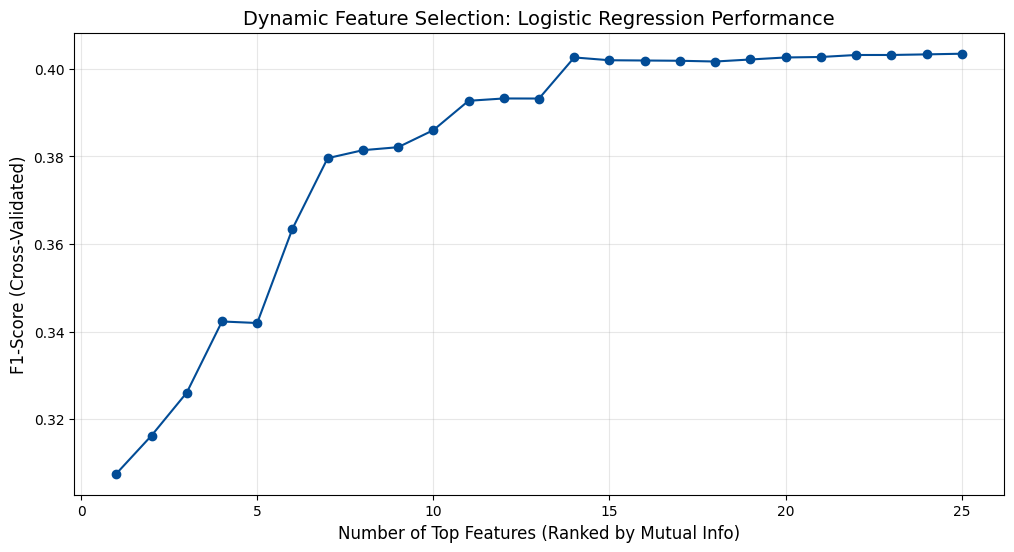

In [3]:
!echo "Running NMI-based feature selection..."
%run NMI_based_feature_selection.py

### 3. Model Training & Hyperparameter Tuning
With our optimized feature set ready, we proceed to train our classification model. 
Since our dataset is heavily imbalanced (most people earn <= $50K), we focus on **F1-Score** and **Recall** for the minority class rather than overall accuracy.

This script searches through various hyperparameters (like tree depth, number of estimators, and minimum samples) to find the absolute best configuration for our model.

In [4]:
!echo "Running model training and hyperparameter tuning..."
%run model_hyperparam_tuning.py

Running model training and hyperparameter tuning...
Starting Tournament with 3 model specifications...

Running Grid Search for Random Forest...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Done! Time: 1031.0s | Best Test F1: 0.5529

Running Grid Search for XGBoost...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Done! Time: 429.4s | Best Test F1: 0.5222

Running Grid Search for LightGBM...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Done! Time: 593.2s | Best Test F1: 0.4915

FINAL RANKINGS
        Model  Best F1
Random Forest 0.552907
      XGBoost 0.522186
     LightGBM 0.491504

CHAMPION MODEL DETAILS:
RandomForestClassifier(class_weight='balanced', max_features=0.5,
                       min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                       random_state=42)

Final Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28072
           1       

### 4. Baseline Comparison & Final Evaluation
A good data science practice is to prove that our feature selection actually helped. 

In this final step, we take our best, tuned model and train it on the **entire raw feature set** (as a baseline).

By comparing the resulting F1-scores and classification reports, we can definitively show whether our feature reduction maintained (or even improved) predictive power while reducing model complexity.

In [6]:
!echo "Running model fitting on all features to set comparison with best model from feature selection..."
%run fitting_best_model_on_all_features.py

Running model fitting on all features to set comparison with best model from feature selection...
Training Champion RF on initial 25 features...

RESULTS FOR 25-FEATURE MODEL
Test F1-Score: 0.5679

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     28072
           1       0.60      0.54      0.57      1857

    accuracy                           0.95     29929
   macro avg       0.79      0.76      0.77     29929
weighted avg       0.95      0.95      0.95     29929

